In [ ]:
#for eda

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# cd [your src path]
%cd /content/drive/MyDrive/bistelligence/BISTelligence/src

/content/drive/MyDrive/bistelligence/BISTelligence/src


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.manifold import TSNE

import data.preprocessing as dp

In [4]:
# data csv file path
path = '/content/drive/MyDrive/bistelligence/BIS_data/BISTelligen_Project_Data.csv'

# get data
data = dp.GetData(path)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1764 entries, 0 to 1763
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   key              1764 non-null   int64  
 1   Pressure         1764 non-null   float64
 2   Power1           1764 non-null   float64
 3   Power2           1764 non-null   float64
 4   Vibration_Peak1  1764 non-null   float64
 5   Vibration_RMS1   1764 non-null   float64
 6   Vibration_Peak2  1764 non-null   float64
 7   Vibration_RMS2   1764 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 110.4 KB


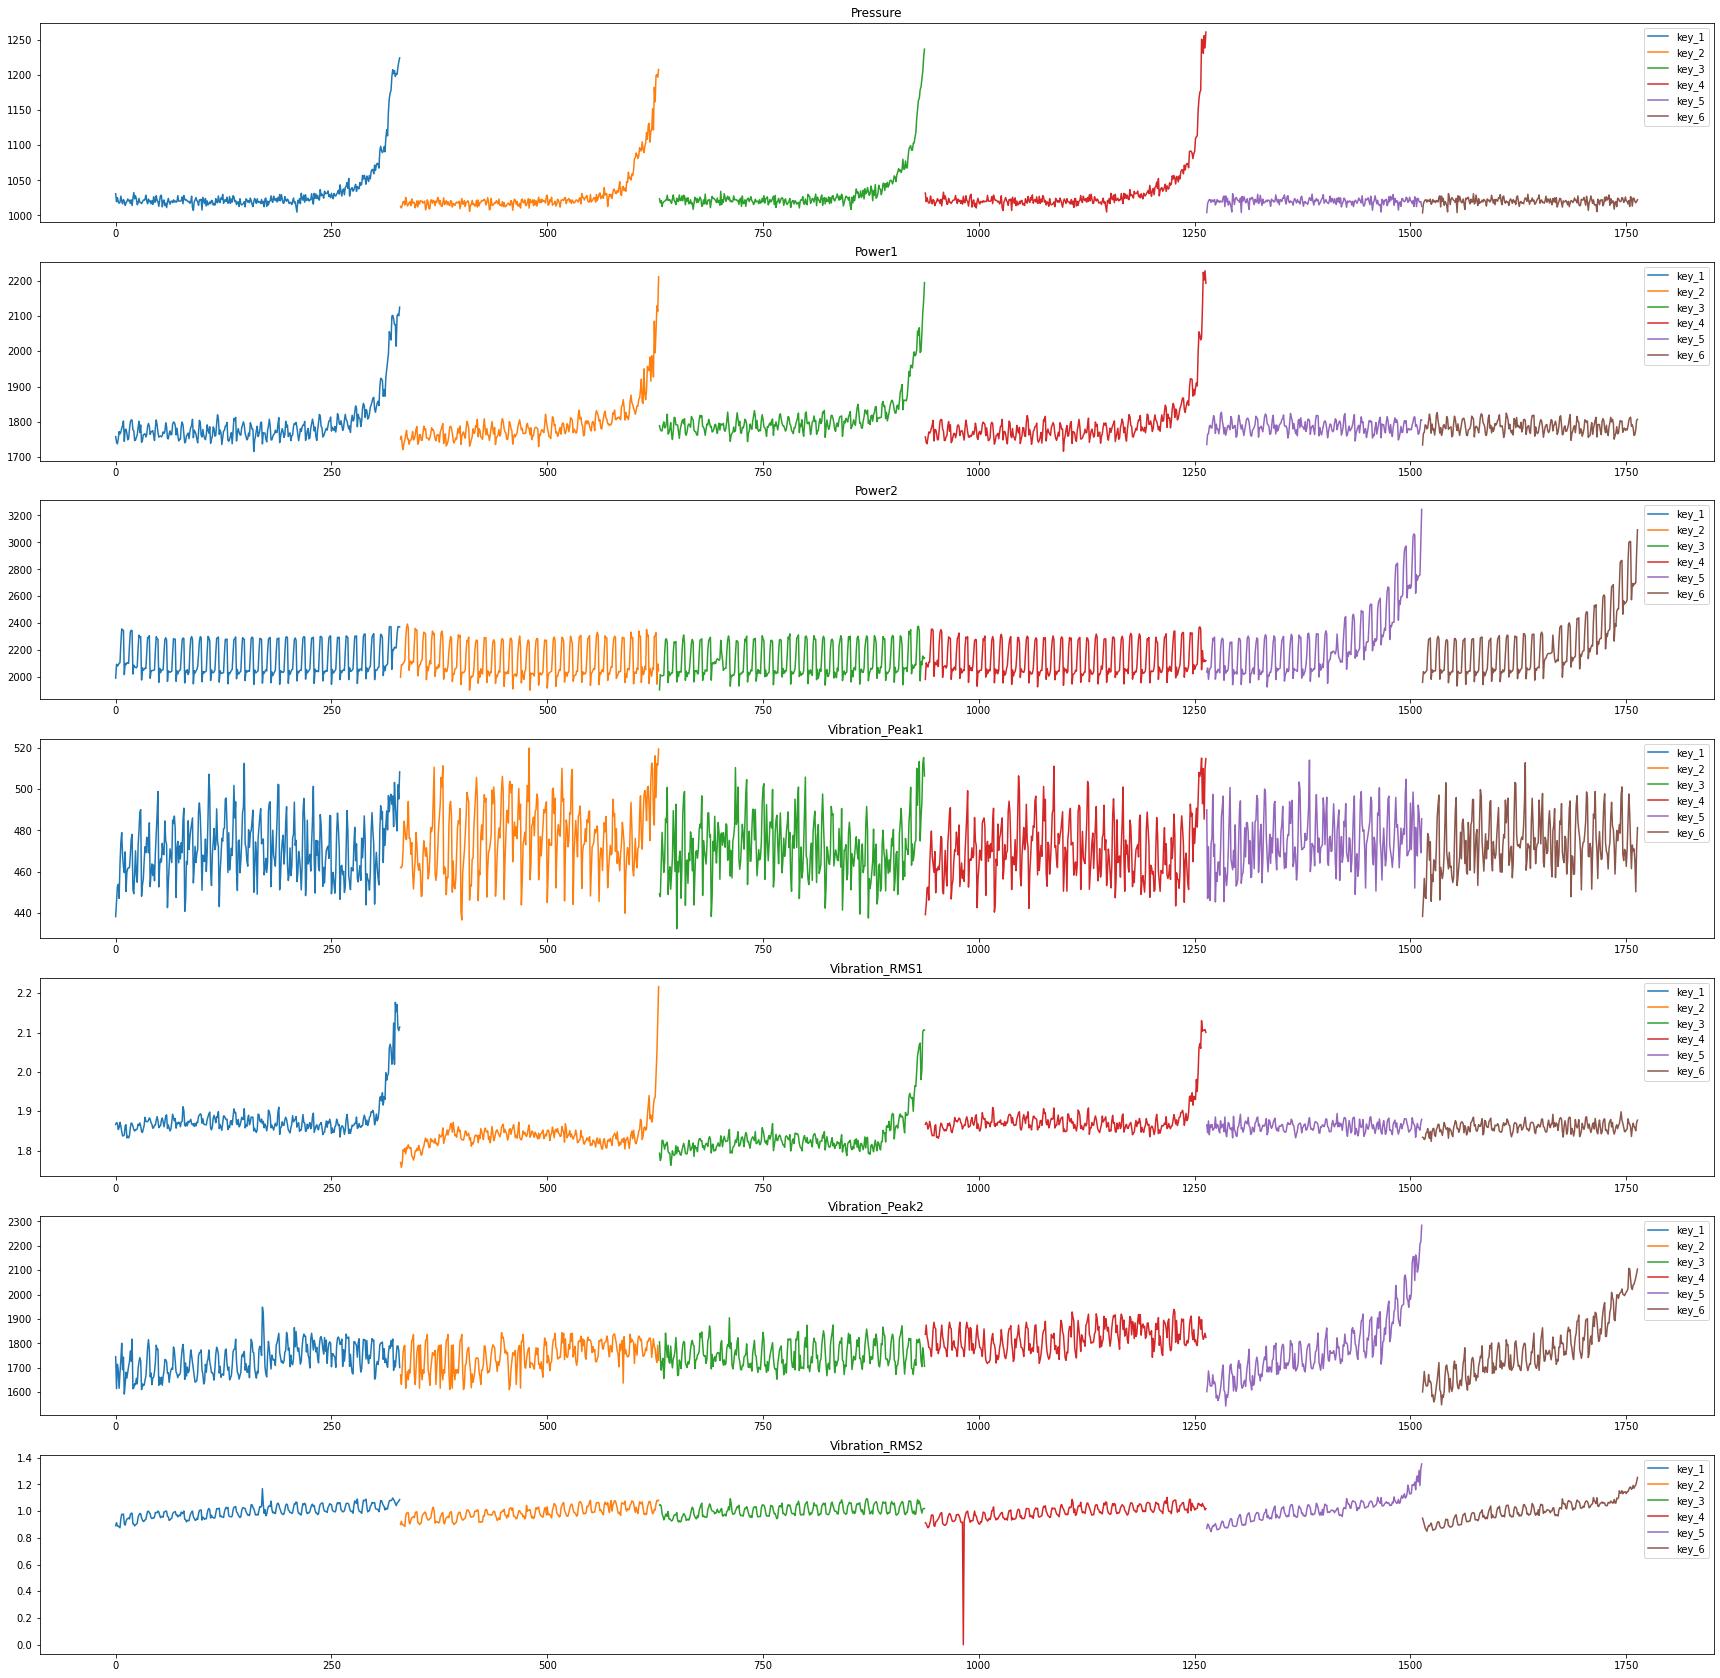

In [6]:
fig= plt.figure(figsize= (30, 30))
a= []
i=0
for y in range(7):
    a.append(fig.add_subplot(7, 1, y+1))

key_legend = ['key_1','key_2','key_3','key_4','key_5','key_6']

for col in data.columns:
    if col=='key':
        continue

    for key_num in data.key.unique():
      a[i].plot(data.loc[data.key==key_num].index, data[col].loc[data.key==key_num],label=key_legend[key_num-1])
    

    title= col
    a[i].set_title(title)
    a[i].legend()
    i+=1

In [11]:
noisy_dropped_data = data.drop(data.loc[data['Vibration_RMS2']<0].index)

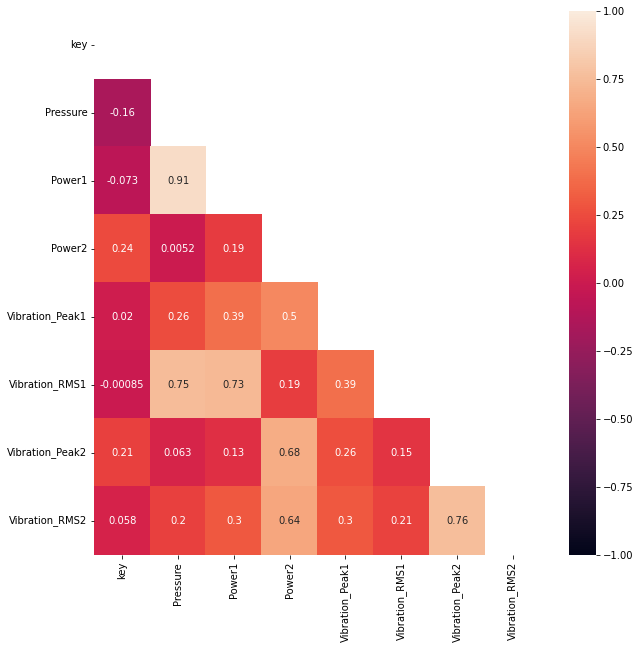

In [13]:
mask=np.zeros_like(noisy_dropped_data.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

plt.rcParams["figure.figsize"] = (10,10)
sns.heatmap(noisy_dropped_data.corr(), vmin=-1, vmax=1,annot=True,mask=mask)

In [14]:
_, imputated_data = dp.GetPreprocessedData(path=path, scaled=False)

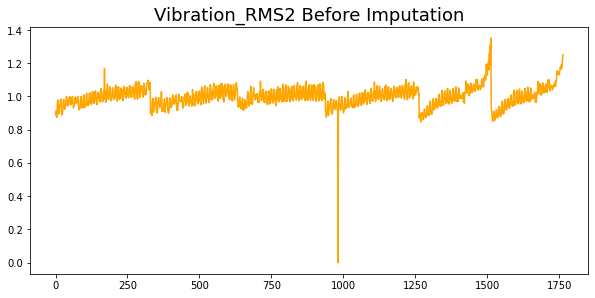

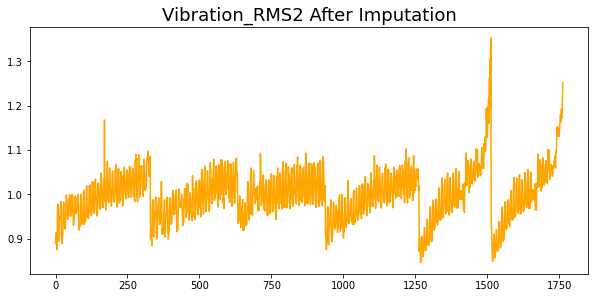

In [15]:
for i in range(2) :
    plt.subplot(2, 1,i+1)
    if i == 0 :
      plt.plot(data['Vibration_RMS2'],color='orange')
      title= ''.join(['Vibration_RMS2', ' Before Imputation'])
    else :
      plt.plot(imputated_data['Vibration_RMS2'],color='orange')
      title= ''.join(['Vibration_RMS2',' After Imputation'])
    plt.title(title,fontdict={'fontsize' : 18})
    plt.show()

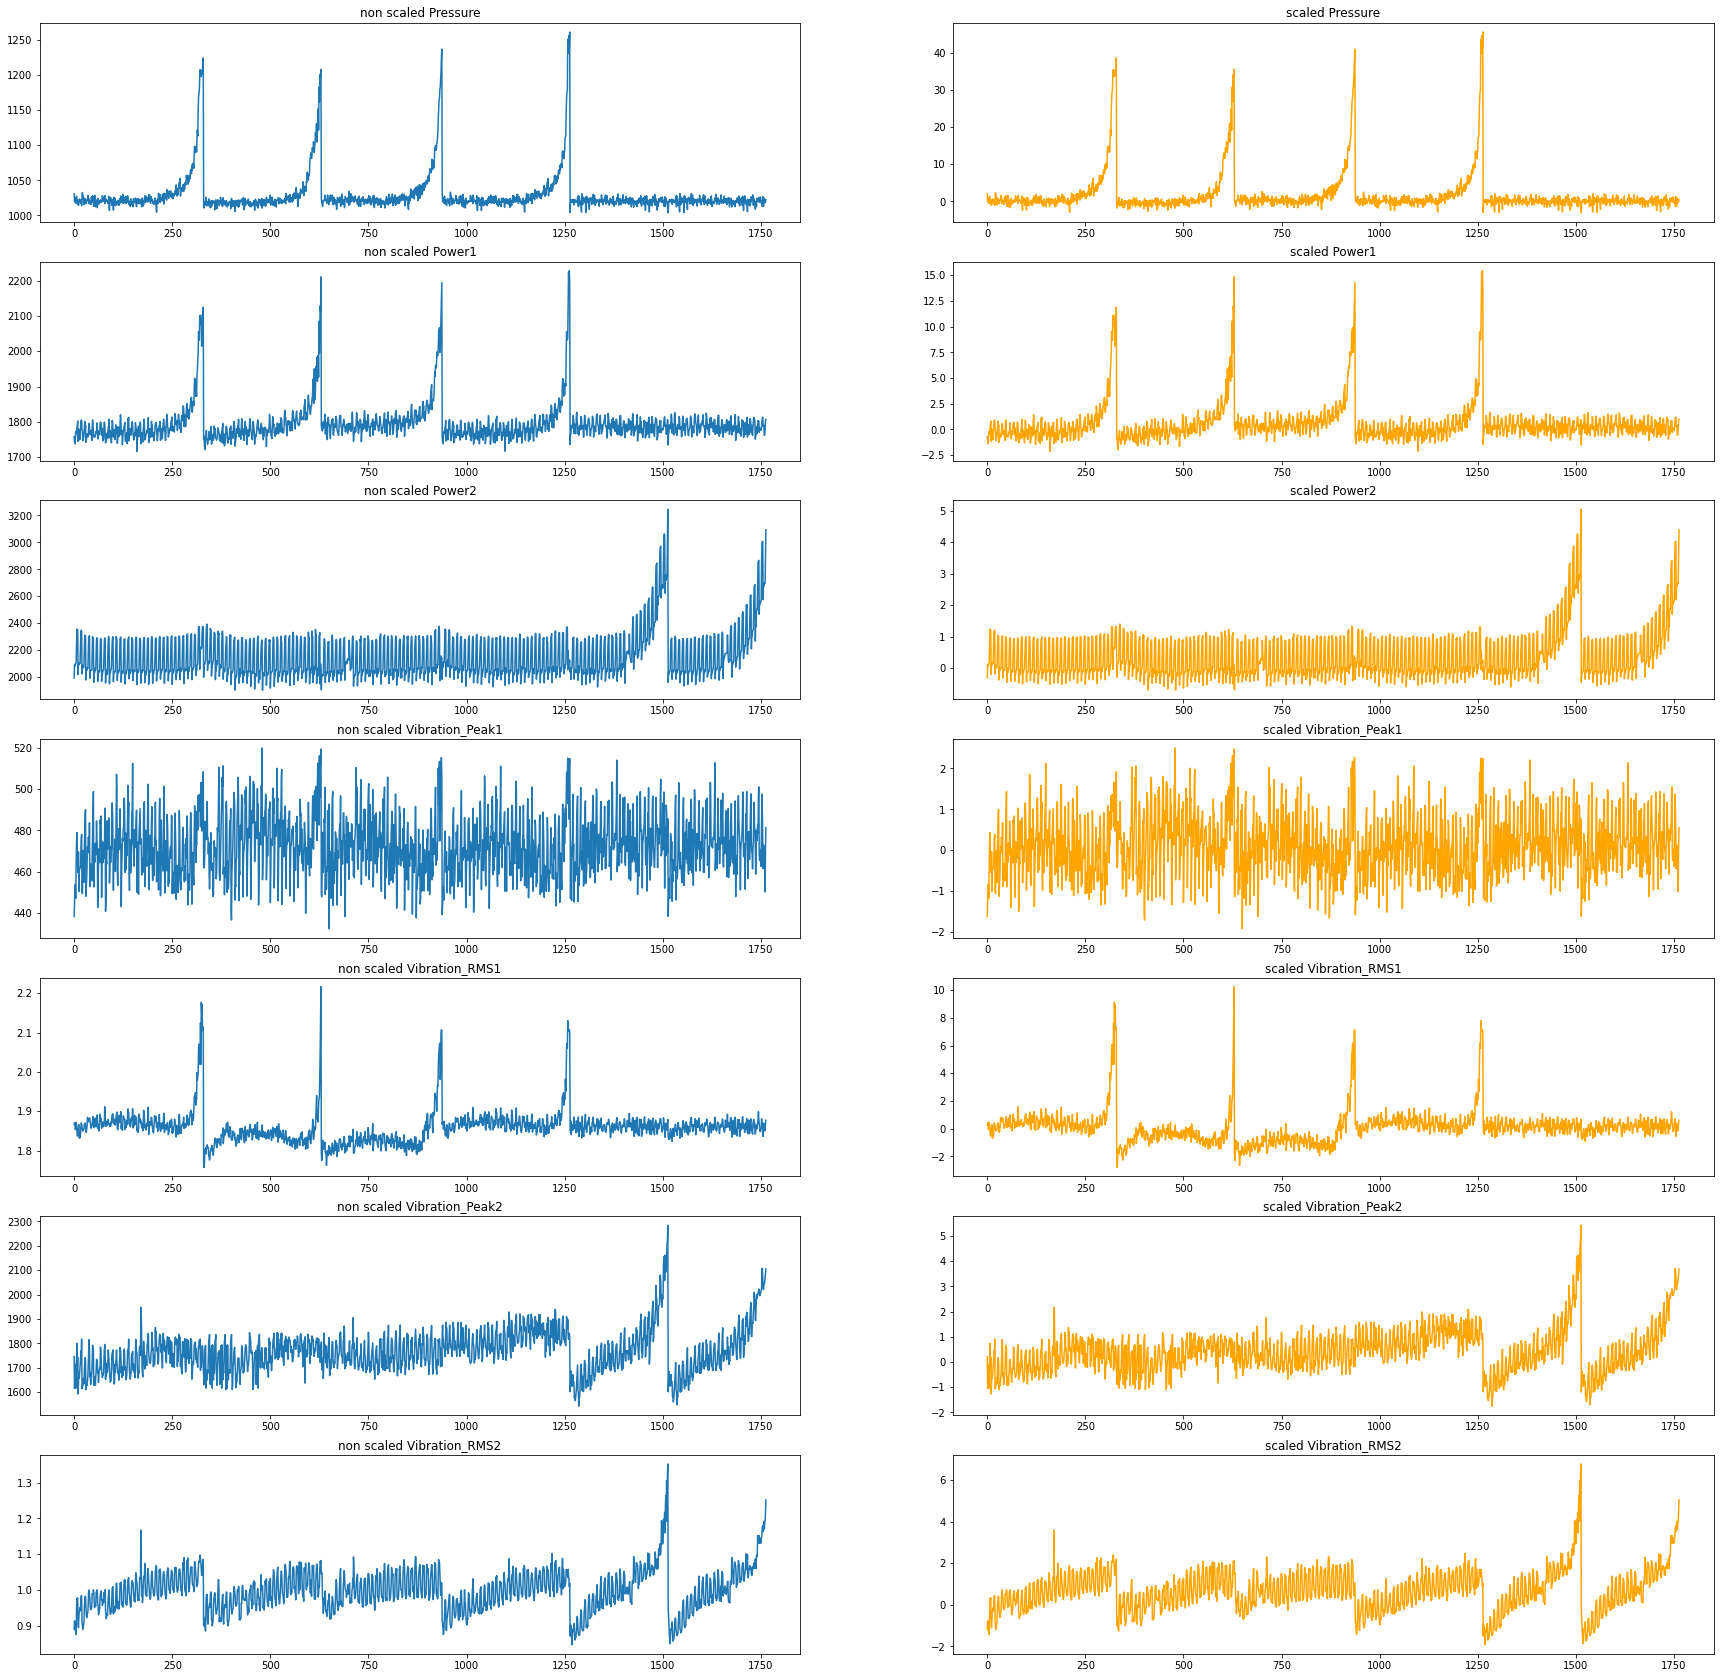

In [16]:
# data scaling 전/후 분포 비교
_, scaled_data = dp.GetPreprocessedData(path=path, scaled=True)

fig= plt.figure(figsize= (30, 30))
a= []
i=0
for y in range(14):
    a.append(fig.add_subplot(7, 2, y+1))

for col in data.columns:

    if col=='key':
      continue

    a[i].plot(imputated_data.index, imputated_data[col])
    

    title= col
    a[i].set_title('non scaled '+title)
    i+=1

    a[i].plot(scaled_data.index, scaled_data[col],color='orange')

    a[i].set_title('scaled '+title)
    i+=1

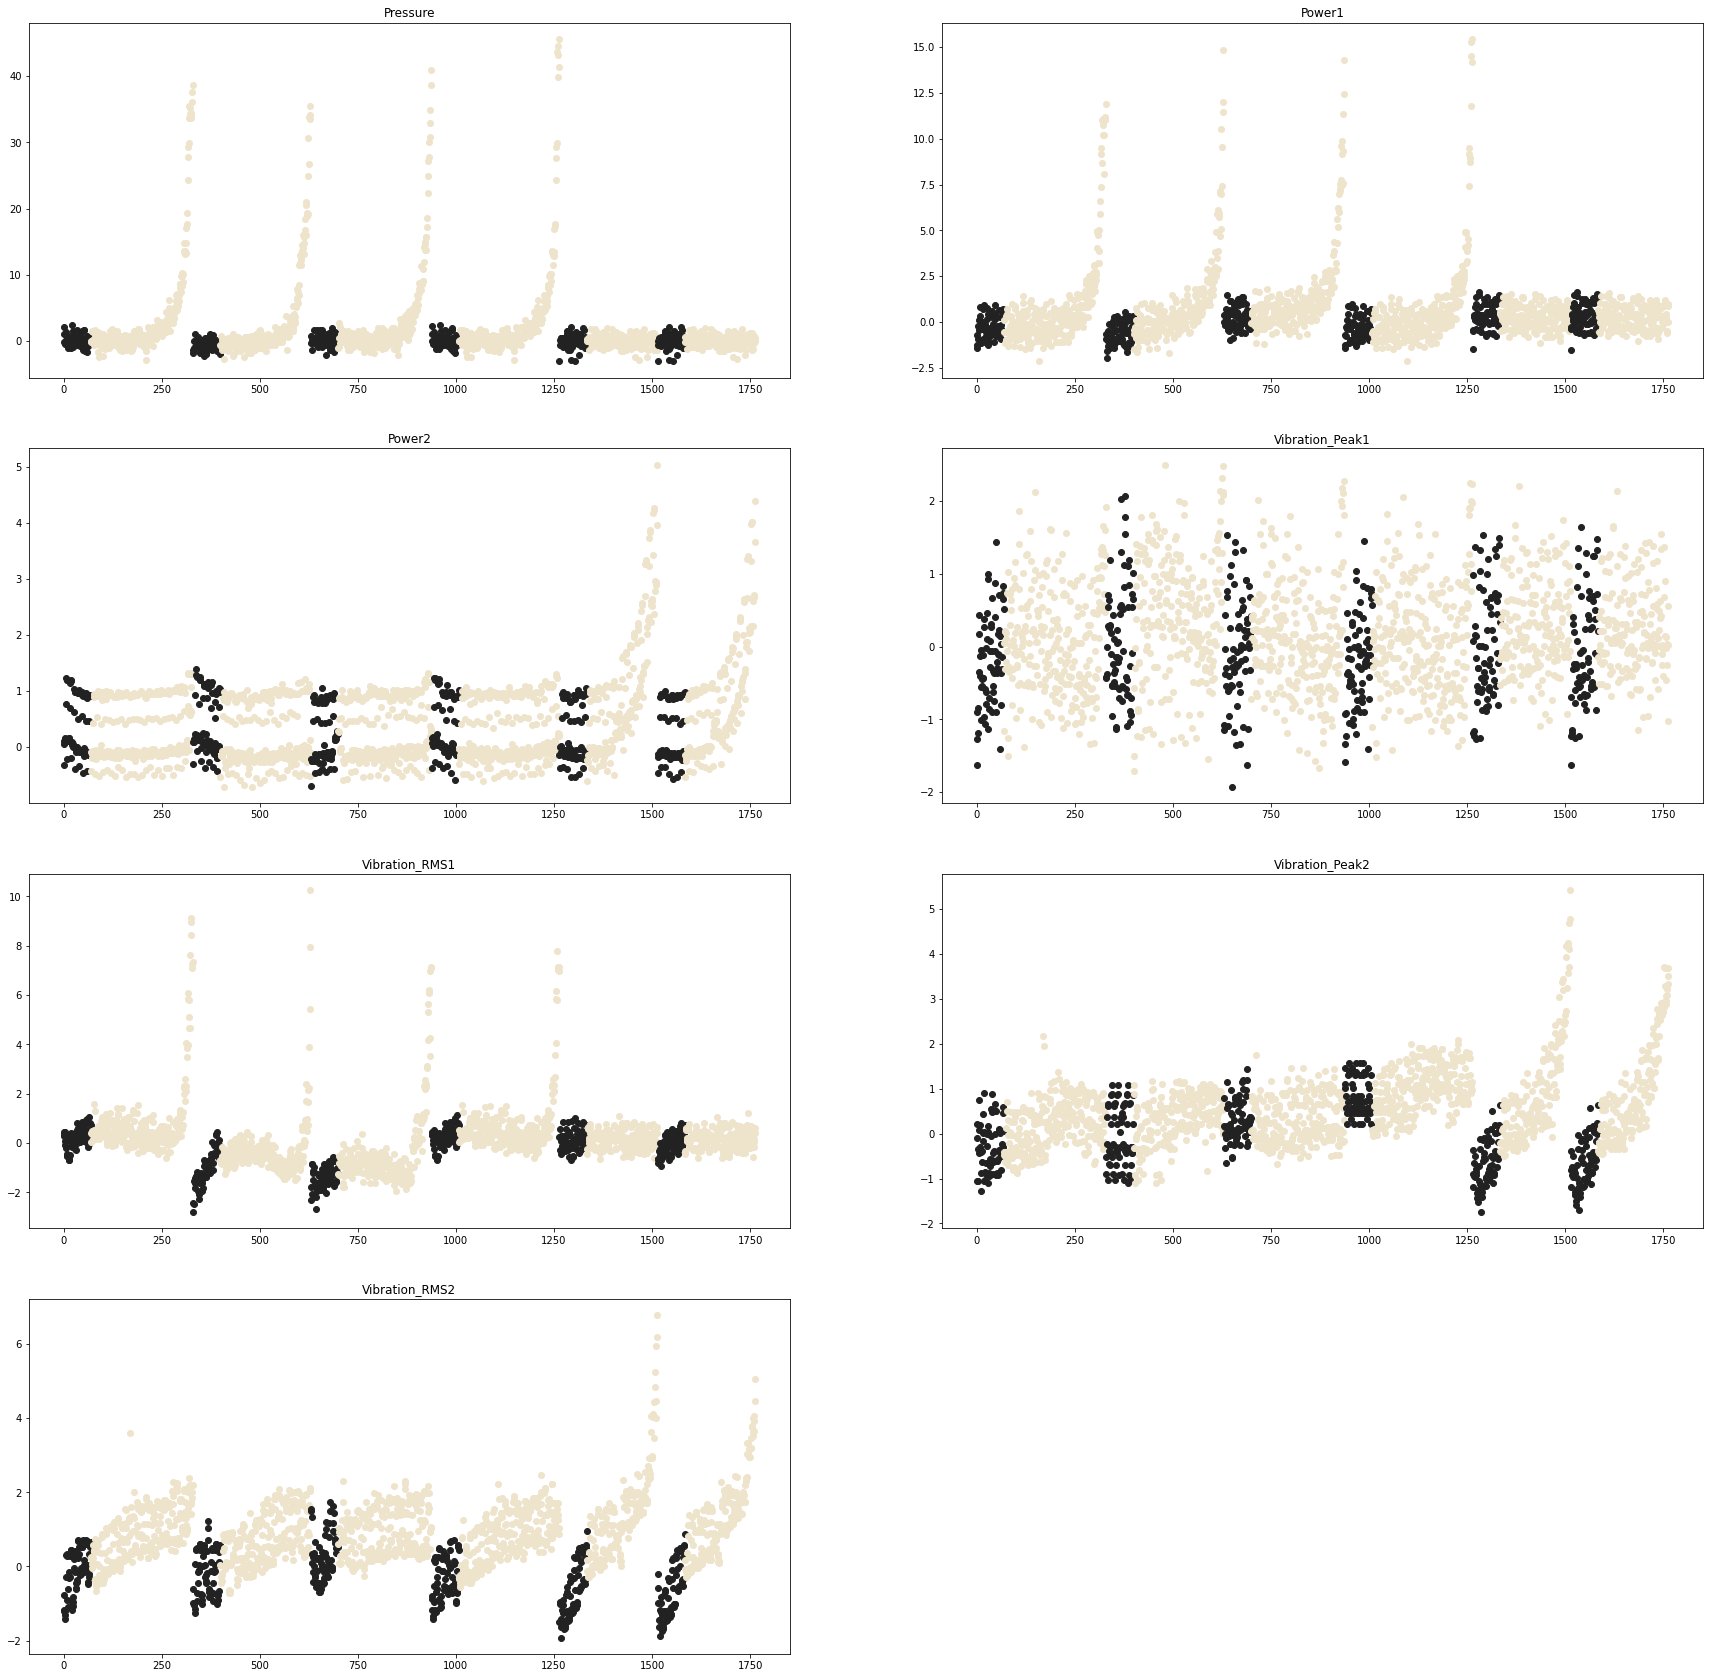

In [17]:
# scaled data로 각 feature scatter plot 시각화 -> normal 범주 선정 시각화(colored)

fig = plt.figure(figsize=(30,30))
a = []
i=0

key_start_point=np.array([data.loc[data.key==key_num].index[0] for key_num in data.key.unique()])

num_normal = 70
normal_end_point=key_start_point + num_normal

for y in range(7):
  a.append(fig.add_subplot(4,2,y+1))

for col in scaled_data.columns:

  for idx in data.key.unique()-1:
    #normal scatter
    a[i].scatter(scaled_data.index[key_start_point[idx]:normal_end_point[idx]],
                 scaled_data[col][key_start_point[idx]:normal_end_point[idx]],color='#222222')
    
    #others scatter
    if idx==5:
      a[i].scatter(scaled_data.index[normal_end_point[idx]:], 
                   scaled_data[col][normal_end_point[idx]:],color='#EEE3CB')
    else:
      a[i].scatter(scaled_data.index[normal_end_point[idx]:key_start_point[idx+1]], 
                   scaled_data[col][normal_end_point[idx]:key_start_point[idx+1]],color='#EEE3CB')

  title=col
  a[i].set_title(title)
  i+=1

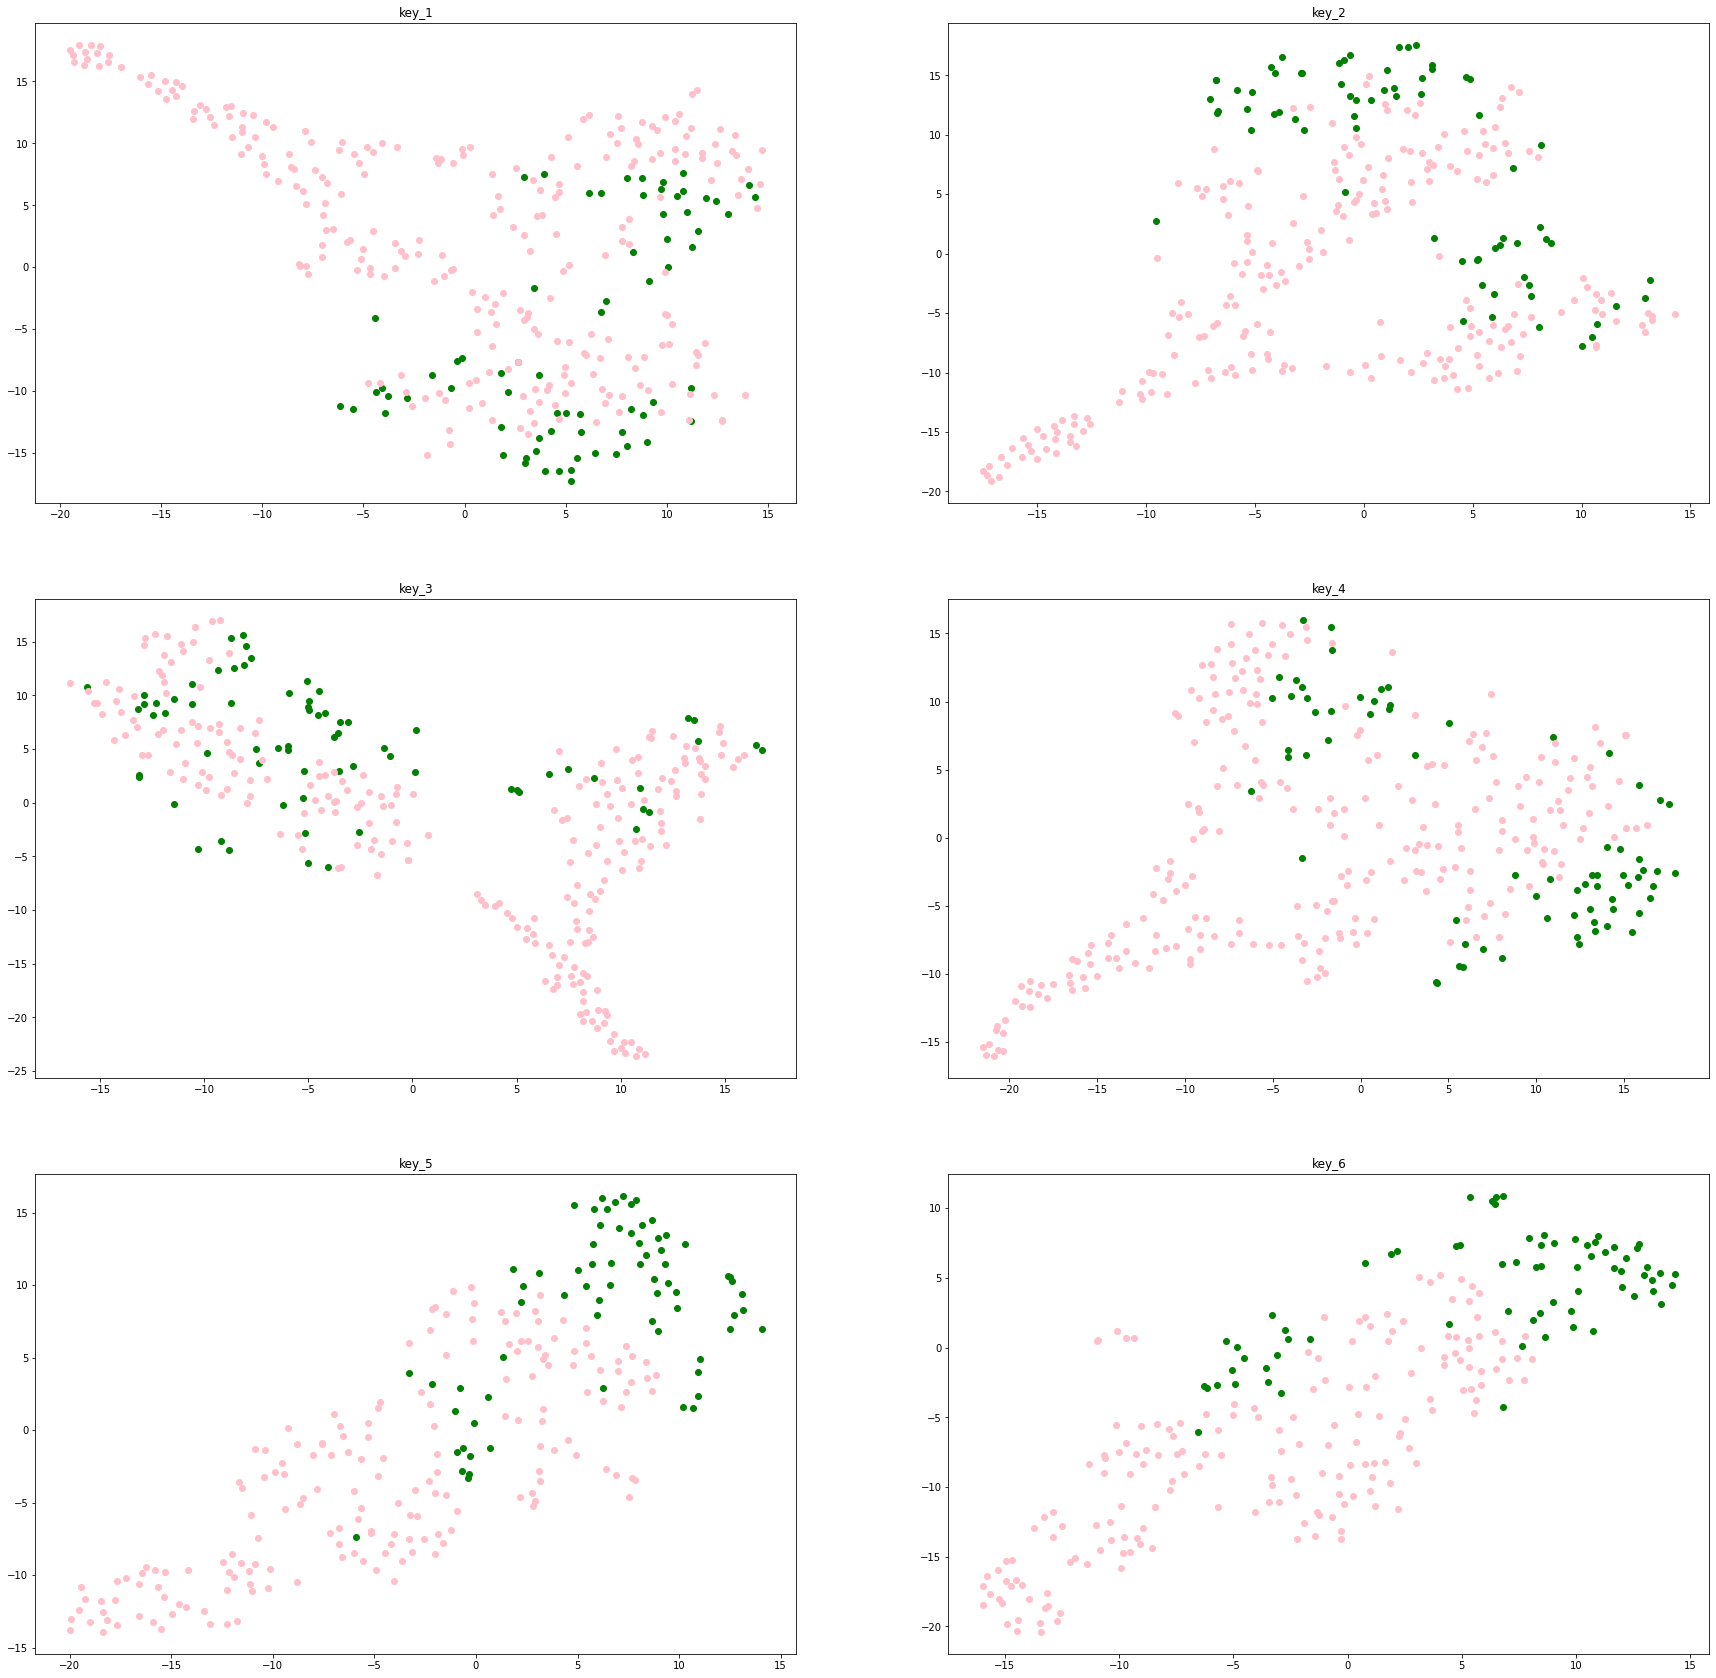

In [18]:
# key별로 TSNE 진행

fig = plt.figure(figsize=(30,30))
a = []
i = 0

for y in range(6):
  a.append(fig.add_subplot(3,2,y+1))

for idx in data.key.unique()-1:
  if idx==5:
    key_data = scaled_data[key_start_point[idx]:]
  else:
    key_data = scaled_data[key_start_point[idx]:key_start_point[idx+1]]
  
  tsne_np = TSNE(n_components=2).fit_transform(key_data)
  tsne_df = pd.DataFrame(tsne_np, columns=['component_0', 'component_1'])
  a[i].scatter(tsne_df['component_0'][:num_normal],tsne_df['component_1'][:num_normal],color='green')
  a[i].scatter(tsne_df['component_0'][num_normal:],tsne_df['component_1'][num_normal:],color='pink')

  title = key_legend[idx]
  a[i].set_title(title)
  i+=1